## Pandas

<img alt="pipeline" src="./images/pd1.png" height="600" width="600">
<p style="text-align:center">Fig: Data Sciene Pipeline</p>

In [1]:
import pandas as pd;
import numpy as np

In [10]:
df=pd.DataFrame({'id':[1,2,3,4,5,6],'Name':['Nitish','Ashish','Sharla','Dan','Nitish','Sharla'],'Miles':[0.1,0.2,0.3,0.4,0.5,None],'Date':['2018-05-02','2018-05-02','2018-05-03','2018-05-03','2018-05-04','2018-05-04']})
df

,Date,Miles,Name,id
0,2018-05-02,0.1,Nitish,1
1,2018-05-02,0.2,Ashish,2
2,2018-05-03,0.3,Sharla,3
3,2018-05-03,0.4,Dan,4
4,2018-05-04,0.5,Nitish,5
5,2018-05-04,NaN,Sharla,6


## 1. Indexing

In [11]:
df.loc[:,['id','Name']]

,id,Name
0,1,Nitish
1,2,Ashish
2,3,Sharla
3,4,Dan
4,5,Nitish
5,6,Sharla


In [ ]:
#Another simple method
df[['id','Name']]

In [ ]:
#filtering on index
df[df['Name']=='Nitish']


In [ ]:
df[df['Miles']>0.3]

In [ ]:
#multiple boolean operators
df[(df['Miles']>0.3) & (df['Name']=='Nitish')]


In [ ]:
#renaming columns
df1=df.rename(columns={'id':'Runner_ID'})
df1

In [ ]:
#To replace existing dataframe, type inplace=true
df.rename(columns={'id':'Runner_ID'}, inplace=True)
df

## 2. Missing Values

In [ ]:
df

In [12]:
df2=df
#drop missing values using dropna method
df2.dropna()

,Date,Miles,Name,id
0,2018-05-02,0.1,Nitish,1
1,2018-05-02,0.2,Ashish,2
2,2018-05-03,0.3,Sharla,3
3,2018-05-03,0.4,Dan,4
4,2018-05-04,0.5,Nitish,5


In [ ]:
#fill missing values using fillna method
df2=df
df2['Miles'].fillna(df2['Miles'].mean()) 

## 3. map, apply, applymap

In [13]:
#map operates over each element in a series
df2['Miles'].dropna().map(lambda x: str(x)+'m')

0    0.1m
1    0.2m
2    0.3m
3    0.4m
4    0.5m
Name: Miles, dtype: object

In [14]:
#apply applies a function along nay axis of the dataframe
def adder(x):
    return x+5
df2[['Miles','id']].apply(adder)


,Miles,id
0,5.1,6
1,5.2,7
2,5.3,8
3,5.4,9
4,5.5,10
5,NaN,11


In [15]:
df2[['Miles','id']].apply(np.sum)

Miles     1.5
id       21.0
dtype: float64

In [ ]:
#applymap applies funciton to each element of the dataframe
df2[['Miles','id']].applymap(adder)

## 4. Vectorized operations

In [17]:
df3=pd.DataFrame({"id":[1,2,3]})


In [18]:
df3["square"]=np.power(df3["id"],2)
df3

,id,square
0,1,1
1,2,4
2,3,9


In [ ]:
df3["mulby3"]=df3["id"]*3
df3

In [19]:
data_from_fitbit=pd.DataFrame({'id':[1,2,3,4,5,6],'Name':['Nitish','Ashish','Sharla','Dan','Nitish','Sharla'],'Miles':[0.1,0.2,0.3,0.4,0.5,None],'Date':['2018-05-02','2018-05-02','2018-05-03','2018-05-03','2018-05-04','2018-05-04']})
data_from_fitbit

,Date,Miles,Name,id
0,2018-05-02,0.1,Nitish,1
1,2018-05-02,0.2,Ashish,2
2,2018-05-03,0.3,Sharla,3
3,2018-05-03,0.4,Dan,4
4,2018-05-04,0.5,Nitish,5
5,2018-05-04,NaN,Sharla,6


# # 5. Data operations

In [20]:
#group by
name_grouped=data_from_fitbit['Miles'].groupby(data_from_fitbit['Name'])
name_grouped.mean()


Name
Ashish    0.2
Dan       0.4
Nitish    0.3
Sharla    0.3
Name: Miles, dtype: float64

In [21]:
data_from_iphone=pd.DataFrame({'Name':['Nitish','Ashish'],'Location':['Boise Foothills','Greenbelt']})
data_from_iphone

,Location,Name
0,Boise Foothills,Nitish
1,Greenbelt,Ashish


In [ ]:
data_from_fitbit

In [22]:
#inner join operation
pd.merge(data_from_fitbit,data_from_iphone,on='Name',how='inner')

,Date,Miles,Name,id,Location
0,2018-05-02,0.1,Nitish,1,Boise Foothills
1,2018-05-04,0.5,Nitish,5,Boise Foothills
2,2018-05-02,0.2,Ashish,2,Greenbelt


In [23]:
#outer join
pd.merge(data_from_fitbit,data_from_iphone,on='Name',how='outer')

,Date,Miles,Name,id,Location
0,2018-05-02,0.1,Nitish,1,Boise Foothills
1,2018-05-04,0.5,Nitish,5,Boise Foothills
2,2018-05-02,0.2,Ashish,2,Greenbelt
3,2018-05-03,0.3,Sharla,3,NaN
4,2018-05-04,NaN,Sharla,6,NaN
5,2018-05-03,0.4,Dan,4,NaN


In [24]:
#left join
pd.merge(data_from_fitbit,data_from_iphone,on='Name',how='left')

,Date,Miles,Name,id,Location
0,2018-05-02,0.1,Nitish,1,Boise Foothills
1,2018-05-02,0.2,Ashish,2,Greenbelt
2,2018-05-03,0.3,Sharla,3,NaN
3,2018-05-03,0.4,Dan,4,NaN
4,2018-05-04,0.5,Nitish,5,Boise Foothills
5,2018-05-04,NaN,Sharla,6,NaN


In [25]:
#Right join
pd.merge(data_from_fitbit,data_from_iphone,on='Name',how='right')

,Date,Miles,Name,id,Location
0,2018-05-02,0.1,Nitish,1,Boise Foothills
1,2018-05-04,0.5,Nitish,5,Boise Foothills
2,2018-05-02,0.2,Ashish,2,Greenbelt


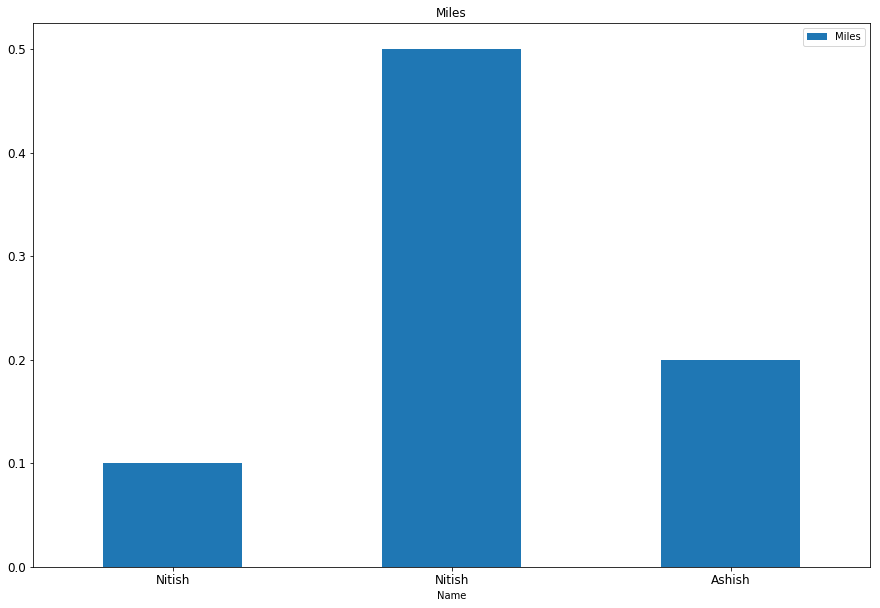

In [26]:
#plotting
import matplotlib.pyplot as plt
%matplotlib inline
total_fitness_data=pd.merge(data_from_fitbit,data_from_iphone,on='Name',how='inner')
total_fitness_data[['Name','Miles']].plot.bar(x='Name', rot=0, title='Miles', figsize=(15,10), fontsize=12)

In [ ]:
total_fitness_data.groupby('Name')['Miles'].apply(np.sum).plot.bar(x='Name', rot=0, title='Miles', figsize=(15,10), fontsize=12)

In [ ]:
mean_values.columns[]

## 6. Statistical operations


In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
df.cov()

## 7. Reading from url

In [28]:
url = 'https://raw.github.com/gjreda/best-sandwiches/master/data/best-sandwiches-geocode.tsv'
# fetch the text from the URL and read it into a DataFrame
from_url = pd.read_table(url, sep='\t')
from_url.head(3)
from_url.describe()


,rank,lat,lng
count,61.000000,61.000000,61.000000
mean,25.278689,41.906938,-87.682965
std,13.689572,0.083674,0.090901
min,1.000000,41.601541,-88.125653
25%,13.000000,41.884672,-87.684425
50%,25.000000,41.898990,-87.648218
75%,36.000000,41.930101,-87.634157
max,50.000000,42.251828,-87.593820
